In [1]:
# traning and validatio loss of lambdanet

In [2]:
import matplotlib.pyplot as plt
import re
import pandas as pd

In [5]:
text = """
0 Lambda training mse:  0.009619 | Lambda validation mse: 0.007167
1 Lambda training mse:  0.007590 | Lambda validation mse: 0.007159
2 Lambda training mse:  0.007585 | Lambda validation mse: 0.007130
3 Lambda training mse:  0.007534 | Lambda validation mse: 0.007113
4 Lambda training mse:  0.007521 | Lambda validation mse: 0.007079
5 Lambda training mse:  0.007576 | Lambda validation mse: 0.007061
6 Lambda training mse:  0.007517 | Lambda validation mse: 0.007075
7 Lambda training mse:  0.007499 | Lambda validation mse: 0.007258
8 Lambda training mse:  0.007523 | Lambda validation mse: 0.007022
9 Lambda training mse:  0.007470 | Lambda validation mse: 0.007043
10 Lambda training mse:  0.007466 | Lambda validation mse: 0.007141
11 Lambda training mse:  0.007456 | Lambda validation mse: 0.006990
12 Lambda training mse:  0.007421 | Lambda validation mse: 0.006973
13 Lambda training mse:  0.007410 | Lambda validation mse: 0.007246
14 Lambda training mse:  0.007414 | Lambda validation mse: 0.006989
15 Lambda training mse:  0.007355 | Lambda validation mse: 0.007208
16 Lambda training mse:  0.007369 | Lambda validation mse: 0.006922
17 Lambda training mse:  0.007345 | Lambda validation mse: 0.006925
18 Lambda training mse:  0.007322 | Lambda validation mse: 0.006881
19 Lambda training mse:  0.007300 | Lambda validation mse: 0.006852
20 Lambda training mse:  0.007288 | Lambda validation mse: 0.006852
21 Lambda training mse:  0.007250 | Lambda validation mse: 0.006965
22 Lambda training mse:  0.007239 | Lambda validation mse: 0.006800
23 Lambda training mse:  0.007216 | Lambda validation mse: 0.006825
24 Lambda training mse:  0.007197 | Lambda validation mse: 0.006986
25 Lambda training mse:  0.007177 | Lambda validation mse: 0.006798
26 Lambda training mse:  0.007182 | Lambda validation mse: 0.006757
27 Lambda training mse:  0.007163 | Lambda validation mse: 0.006831
28 Lambda training mse:  0.007155 | Lambda validation mse: 0.006751
29 Lambda training mse:  0.007106 | Lambda validation mse: 0.006728
30 Lambda training mse:  0.007111 | Lambda validation mse: 0.007017
31 Lambda training mse:  0.007089 | Lambda validation mse: 0.006940
32 Lambda training mse:  0.007084 | Lambda validation mse: 0.006694
33 Lambda training mse:  0.007075 | Lambda validation mse: 0.006748
34 Lambda training mse:  0.007061 | Lambda validation mse: 0.007107
35 Lambda training mse:  0.007044 | Lambda validation mse: 0.006713
36 Lambda training mse:  0.007046 | Lambda validation mse: 0.006722
37 Lambda training mse:  0.007039 | Lambda validation mse: 0.007308
38 Lambda training mse:  0.007012 | Lambda validation mse: 0.006838
39 Lambda training mse:  0.007018 | Lambda validation mse: 0.006923
40 Lambda training mse:  0.006998 | Lambda validation mse: 0.006631
41 Lambda training mse:  0.006983 | Lambda validation mse: 0.006629
42 Lambda training mse:  0.006989 | Lambda validation mse: 0.006973
43 Lambda training mse:  0.006985 | Lambda validation mse: 0.006623
44 Lambda training mse:  0.006972 | Lambda validation mse: 0.006626
45 Lambda training mse:  0.006966 | Lambda validation mse: 0.006757
46 Lambda training mse:  0.006970 | Lambda validation mse: 0.006629
47 Lambda training mse:  0.006946 | Lambda validation mse: 0.006613
48 Lambda training mse:  0.006944 | Lambda validation mse: 0.006612
49 Lambda training mse:  0.006935 | Lambda validation mse: 0.006594
50 Lambda training mse:  0.006945 | Lambda validation mse: 0.006637
51 Lambda training mse:  0.006930 | Lambda validation mse: 0.006691
52 Lambda training mse:  0.006935 | Lambda validation mse: 0.006591
53 Lambda training mse:  0.006919 | Lambda validation mse: 0.006639
54 Lambda training mse:  0.006917 | Lambda validation mse: 0.006629
55 Lambda training mse:  0.006917 | Lambda validation mse: 0.006638
56 Lambda training mse:  0.006910 | Lambda validation mse: 0.006617
57 Lambda training mse:  0.006905 | Lambda validation mse: 0.006595
58 Lambda training mse:  0.006913 | Lambda validation mse: 0.006594
59 Lambda training mse:  0.006896 | Lambda validation mse: 0.006619
60 Lambda training mse:  0.006892 | Lambda validation mse: 0.006601
61 Lambda training mse:  0.006901 | Lambda validation mse: 0.006631
62 Lambda training mse:  0.006892 | Lambda validation mse: 0.006587
63 Lambda training mse:  0.006894 | Lambda validation mse: 0.006572
64 Lambda training mse:  0.006888 | Lambda validation mse: 0.006669
65 Lambda training mse:  0.006880 | Lambda validation mse: 0.006589
66 Lambda training mse:  0.006874 | Lambda validation mse: 0.006597
67 Lambda training mse:  0.006883 | Lambda validation mse: 0.006584
68 Lambda training mse:  0.006872 | Lambda validation mse: 0.006525
69 Lambda training mse:  0.006872 | Lambda validation mse: 0.006587
70 Lambda training mse:  0.006878 | Lambda validation mse: 0.006585
71 Lambda training mse:  0.006862 | Lambda validation mse: 0.006601
72 Lambda training mse:  0.006875 | Lambda validation mse: 0.006615
73 Lambda training mse:  0.006870 | Lambda validation mse: 0.006601
74 Lambda training mse:  0.006859 | Lambda validation mse: 0.006597
75 Lambda training mse:  0.006867 | Lambda validation mse: 0.006577
76 Lambda training mse:  0.006865 | Lambda validation mse: 0.006582
77 Lambda training mse:  0.006849 | Lambda validation mse: 0.006570
78 Lambda training mse:  0.006862 | Lambda validation mse: 0.006573
79 Lambda training mse:  0.006859 | Lambda validation mse: 0.006644
80 Lambda training mse:  0.006856 | Lambda validation mse: 0.006602
81 Lambda training mse:  0.006859 | Lambda validation mse: 0.006578
82 Lambda training mse:  0.006854 | Lambda validation mse: 0.006574
83 Lambda training mse:  0.006851 | Lambda validation mse: 0.006610
84 Lambda training mse:  0.006853 | Lambda validation mse: 0.006573
85 Lambda training mse:  0.006856 | Lambda validation mse: 0.006582
86 Lambda training mse:  0.006851 | Lambda validation mse: 0.006573
87 Lambda training mse:  0.006853 | Lambda validation mse: 0.006578
88 Lambda training mse:  0.006850 | Lambda validation mse: 0.006565
89 Lambda training mse:  0.006847 | Lambda validation mse: 0.006570
90 Lambda training mse:  0.006845 | Lambda validation mse: 0.006575
91 Lambda training mse:  0.006846 | Lambda validation mse: 0.006565
92 Lambda training mse:  0.006846 | Lambda validation mse: 0.006593
93 Lambda training mse:  0.006841 | Lambda validation mse: 0.006578
94 Lambda training mse:  0.006845 | Lambda validation mse: 0.006573
95 Lambda training mse:  0.006846 | Lambda validation mse: 0.006586
96 Lambda training mse:  0.006840 | Lambda validation mse: 0.006564
97 Lambda training mse:  0.006832 | Lambda validation mse: 0.006577
98 Lambda training mse:  0.006842 | Lambda validation mse: 0.006579
99 Lambda training mse:  0.006842 | Lambda validation mse: 0.006565
"""
train_mse = [float(match) for match in re.findall(r"Lambda training mse:\s+([0-9\.]+)", text)]
val_mse = [float(match) for match in re.findall(r"Lambda validation mse:\s+([0-9\.]+)", text)]

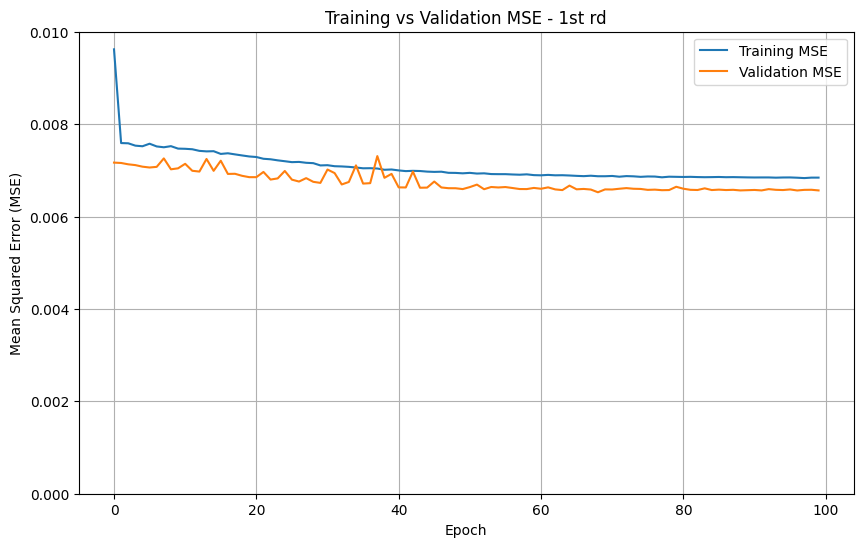

In [6]:
epochs = range(100)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_mse, label='Training MSE')
plt.plot(epochs, val_mse, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs Validation MSE - 1st rd')
plt.legend()
plt.ylim(0.000, 0.0100)
plt.grid(True)
plt.show()

In [2]:
text = """
0 Lambda training mse:  0.155465 | Lambda validation mse: 0.152337
1 Lambda training mse:  0.155425 | Lambda validation mse: 0.152373
2 Lambda training mse:  0.155675 | Lambda validation mse: 0.152392
3 Lambda training mse:  0.155252 | Lambda validation mse: 0.152389
4 Lambda training mse:  0.155684 | Lambda validation mse: 0.152369
5 Lambda training mse:  0.155581 | Lambda validation mse: 0.152351
6 Lambda training mse:  0.155648 | Lambda validation mse: 0.152304
7 Lambda training mse:  0.155630 | Lambda validation mse: 0.152361
8 Lambda training mse:  0.155569 | Lambda validation mse: 0.152376
9 Lambda training mse:  0.155492 | Lambda validation mse: 0.152364
10 Lambda training mse:  0.155121 | Lambda validation mse: 0.152364
11 Lambda training mse:  0.155475 | Lambda validation mse: 0.152332
12 Lambda training mse:  0.155691 | Lambda validation mse: 0.152271
13 Lambda training mse:  0.155577 | Lambda validation mse: 0.152184
14 Lambda training mse:  0.155533 | Lambda validation mse: 0.152387
15 Lambda training mse:  0.155685 | Lambda validation mse: 0.152225
16 Lambda training mse:  0.155670 | Lambda validation mse: 0.152355
17 Lambda training mse:  0.155593 | Lambda validation mse: 0.152310
18 Lambda training mse:  0.155417 | Lambda validation mse: 0.152355
19 Lambda training mse:  0.155696 | Lambda validation mse: 0.152298
20 Lambda training mse:  0.155652 | Lambda validation mse: 0.151592
21 Lambda training mse:  0.155631 | Lambda validation mse: 0.152369
22 Lambda training mse:  0.155656 | Lambda validation mse: 0.152355
23 Lambda training mse:  0.155677 | Lambda validation mse: 0.152351
24 Lambda training mse:  0.155234 | Lambda validation mse: 0.152308
25 Lambda training mse:  0.155601 | Lambda validation mse: 0.152334
26 Lambda training mse:  0.155678 | Lambda validation mse: 0.152374
27 Lambda training mse:  0.155482 | Lambda validation mse: 0.152370
28 Lambda training mse:  0.155366 | Lambda validation mse: 0.152383
29 Lambda training mse:  0.155530 | Lambda validation mse: 0.152284
30 Lambda training mse:  0.155557 | Lambda validation mse: 0.152325
31 Lambda training mse:  0.155420 | Lambda validation mse: 0.152371
32 Lambda training mse:  0.155679 | Lambda validation mse: 0.152387
33 Lambda training mse:  0.155651 | Lambda validation mse: 0.152385
34 Lambda training mse:  0.155477 | Lambda validation mse: 0.152359
35 Lambda training mse:  0.155282 | Lambda validation mse: 0.152382
36 Lambda training mse:  0.155522 | Lambda validation mse: 0.152013
37 Lambda training mse:  0.155711 | Lambda validation mse: 0.152317
38 Lambda training mse:  0.155386 | Lambda validation mse: 0.152283
39 Lambda training mse:  0.155705 | Lambda validation mse: 0.152391
40 Lambda training mse:  0.155607 | Lambda validation mse: 0.152386
41 Lambda training mse:  0.155659 | Lambda validation mse: 0.151994
42 Lambda training mse:  0.155370 | Lambda validation mse: 0.152091
43 Lambda training mse:  0.155706 | Lambda validation mse: 0.152078
44 Lambda training mse:  0.155349 | Lambda validation mse: 0.152112
45 Lambda training mse:  0.155590 | Lambda validation mse: 0.152338
46 Lambda training mse:  0.155649 | Lambda validation mse: 0.152130
47 Lambda training mse:  0.155674 | Lambda validation mse: 0.152331
48 Lambda training mse:  0.155644 | Lambda validation mse: 0.152277
49 Lambda training mse:  0.155663 | Lambda validation mse: 0.152054
50 Lambda training mse:  0.155693 | Lambda validation mse: 0.152349
51 Lambda training mse:  0.155614 | Lambda validation mse: 0.152212
52 Lambda training mse:  0.155606 | Lambda validation mse: 0.152338
53 Lambda training mse:  0.155623 | Lambda validation mse: 0.152203
54 Lambda training mse:  0.155072 | Lambda validation mse: 0.152137
55 Lambda training mse:  0.155670 | Lambda validation mse: 0.152295
56 Lambda training mse:  0.155629 | Lambda validation mse: 0.152333
57 Lambda training mse:  0.155544 | Lambda validation mse: 0.152347
58 Lambda training mse:  0.155696 | Lambda validation mse: 0.151526
59 Lambda training mse:  0.155692 | Lambda validation mse: 0.151441
60 Lambda training mse:  0.155315 | Lambda validation mse: 0.152304
61 Lambda training mse:  0.155689 | Lambda validation mse: 0.152364
62 Lambda training mse:  0.155681 | Lambda validation mse: 0.152203
63 Lambda training mse:  0.155559 | Lambda validation mse: 0.151970
64 Lambda training mse:  0.155702 | Lambda validation mse: 0.152303
65 Lambda training mse:  0.155709 | Lambda validation mse: 0.152320
66 Lambda training mse:  0.155632 | Lambda validation mse: 0.152135
67 Lambda training mse:  0.155632 | Lambda validation mse: 0.152348
68 Lambda training mse:  0.155683 | Lambda validation mse: 0.152385
69 Lambda training mse:  0.154608 | Lambda validation mse: 0.152358
70 Lambda training mse:  0.155503 | Lambda validation mse: 0.152354
71 Lambda training mse:  0.155471 | Lambda validation mse: 0.152343
72 Lambda training mse:  0.155692 | Lambda validation mse: 0.152339
73 Lambda training mse:  0.155671 | Lambda validation mse: 0.152383
74 Lambda training mse:  0.155537 | Lambda validation mse: 0.151743
75 Lambda training mse:  0.155499 | Lambda validation mse: 0.152263
76 Lambda training mse:  0.155558 | Lambda validation mse: 0.152372
77 Lambda training mse:  0.155394 | Lambda validation mse: 0.152239
78 Lambda training mse:  0.155706 | Lambda validation mse: 0.152327
79 Lambda training mse:  0.154337 | Lambda validation mse: 0.151514
80 Lambda training mse:  0.155488 | Lambda validation mse: 0.152350
81 Lambda training mse:  0.155654 | Lambda validation mse: 0.152113
82 Lambda training mse:  0.155281 | Lambda validation mse: 0.152288
83 Lambda training mse:  0.155696 | Lambda validation mse: 0.152297
84 Lambda training mse:  0.155667 | Lambda validation mse: 0.152378
85 Lambda training mse:  0.155612 | Lambda validation mse: 0.151481
86 Lambda training mse:  0.155504 | Lambda validation mse: 0.152366
87 Lambda training mse:  0.155605 | Lambda validation mse: 0.152382
88 Lambda training mse:  0.155541 | Lambda validation mse: 0.152354
89 Lambda training mse:  0.155653 | Lambda validation mse: 0.152334
90 Lambda training mse:  0.155633 | Lambda validation mse: 0.152249
91 Lambda training mse:  0.155688 | Lambda validation mse: 0.152352
92 Lambda training mse:  0.155708 | Lambda validation mse: 0.152244
93 Lambda training mse:  0.155682 | Lambda validation mse: 0.152236
94 Lambda training mse:  0.155423 | Lambda validation mse: 0.152390
95 Lambda training mse:  0.155438 | Lambda validation mse: 0.152226
96 Lambda training mse:  0.155687 | Lambda validation mse: 0.152322
97 Lambda training mse:  0.155607 | Lambda validation mse: 0.152358
98 Lambda training mse:  0.154993 | Lambda validation mse: 0.152270
99 Lambda training mse:  0.155552 | Lambda validation mse: 0.152351
"""
train_mse = [float(match) for match in re.findall(r"Lambda training mse:\s+([0-9\.]+)", text)]
val_mse = [float(match) for match in re.findall(r"Lambda validation mse:\s+([0-9\.]+)", text)]

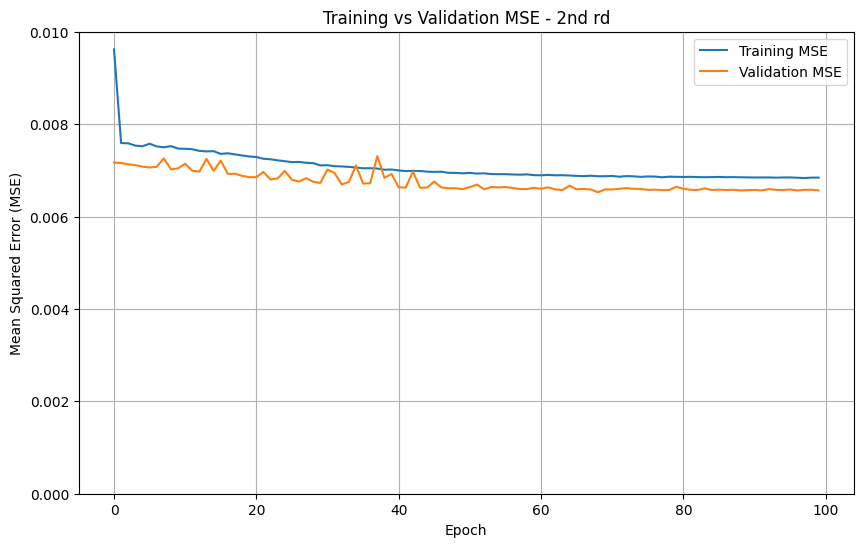

In [7]:
epochs = range(100)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_mse, label='Training MSE')
plt.plot(epochs, val_mse, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs Validation MSE - 2nd rd')
plt.legend()
plt.ylim(0.000, 0.0100)

plt.grid(True)
plt.show()

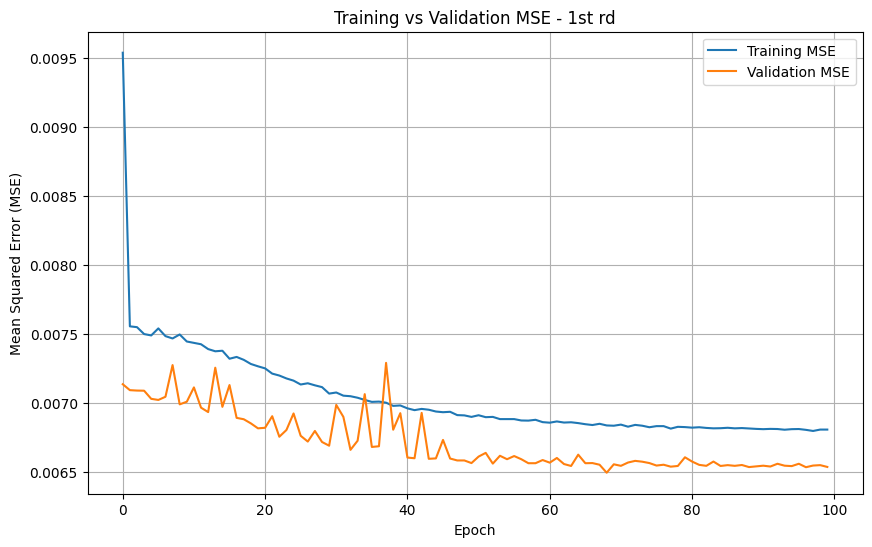

In [11]:
# reinitializa lambda net after each rd
text = """
0 Lambda training mse:  0.009540 | Lambda validation mse: 0.007135
1 Lambda training mse:  0.007555 | Lambda validation mse: 0.007092
2 Lambda training mse:  0.007549 | Lambda validation mse: 0.007089
3 Lambda training mse:  0.007499 | Lambda validation mse: 0.007088
4 Lambda training mse:  0.007489 | Lambda validation mse: 0.007029
5 Lambda training mse:  0.007540 | Lambda validation mse: 0.007021
6 Lambda training mse:  0.007484 | Lambda validation mse: 0.007044
7 Lambda training mse:  0.007467 | Lambda validation mse: 0.007274
8 Lambda training mse:  0.007496 | Lambda validation mse: 0.006989
9 Lambda training mse:  0.007445 | Lambda validation mse: 0.007008
10 Lambda training mse:  0.007435 | Lambda validation mse: 0.007112
11 Lambda training mse:  0.007425 | Lambda validation mse: 0.006965
12 Lambda training mse:  0.007390 | Lambda validation mse: 0.006933
13 Lambda training mse:  0.007374 | Lambda validation mse: 0.007255
14 Lambda training mse:  0.007378 | Lambda validation mse: 0.006971
15 Lambda training mse:  0.007320 | Lambda validation mse: 0.007129
16 Lambda training mse:  0.007333 | Lambda validation mse: 0.006891
17 Lambda training mse:  0.007312 | Lambda validation mse: 0.006881
18 Lambda training mse:  0.007282 | Lambda validation mse: 0.006851
19 Lambda training mse:  0.007265 | Lambda validation mse: 0.006815
20 Lambda training mse:  0.007250 | Lambda validation mse: 0.006819
21 Lambda training mse:  0.007212 | Lambda validation mse: 0.006903
22 Lambda training mse:  0.007198 | Lambda validation mse: 0.006754
23 Lambda training mse:  0.007177 | Lambda validation mse: 0.006803
24 Lambda training mse:  0.007161 | Lambda validation mse: 0.006923
25 Lambda training mse:  0.007133 | Lambda validation mse: 0.006761
26 Lambda training mse:  0.007142 | Lambda validation mse: 0.006719
27 Lambda training mse:  0.007127 | Lambda validation mse: 0.006796
28 Lambda training mse:  0.007114 | Lambda validation mse: 0.006716
29 Lambda training mse:  0.007067 | Lambda validation mse: 0.006689
30 Lambda training mse:  0.007075 | Lambda validation mse: 0.006985
31 Lambda training mse:  0.007052 | Lambda validation mse: 0.006898
32 Lambda training mse:  0.007048 | Lambda validation mse: 0.006659
33 Lambda training mse:  0.007037 | Lambda validation mse: 0.006725
34 Lambda training mse:  0.007021 | Lambda validation mse: 0.007063
35 Lambda training mse:  0.007007 | Lambda validation mse: 0.006680
36 Lambda training mse:  0.007009 | Lambda validation mse: 0.006685
37 Lambda training mse:  0.007001 | Lambda validation mse: 0.007290
38 Lambda training mse:  0.006978 | Lambda validation mse: 0.006805
39 Lambda training mse:  0.006981 | Lambda validation mse: 0.006925
40 Lambda training mse:  0.006960 | Lambda validation mse: 0.006603
41 Lambda training mse:  0.006947 | Lambda validation mse: 0.006598
42 Lambda training mse:  0.006956 | Lambda validation mse: 0.006927
43 Lambda training mse:  0.006950 | Lambda validation mse: 0.006594
44 Lambda training mse:  0.006937 | Lambda validation mse: 0.006597
45 Lambda training mse:  0.006932 | Lambda validation mse: 0.006731
46 Lambda training mse:  0.006935 | Lambda validation mse: 0.006596
47 Lambda training mse:  0.006911 | Lambda validation mse: 0.006582
48 Lambda training mse:  0.006909 | Lambda validation mse: 0.006582
49 Lambda training mse:  0.006898 | Lambda validation mse: 0.006563
50 Lambda training mse:  0.006910 | Lambda validation mse: 0.006610
51 Lambda training mse:  0.006896 | Lambda validation mse: 0.006637
52 Lambda training mse:  0.006898 | Lambda validation mse: 0.006559
53 Lambda training mse:  0.006882 | Lambda validation mse: 0.006616
54 Lambda training mse:  0.006882 | Lambda validation mse: 0.006591
55 Lambda training mse:  0.006882 | Lambda validation mse: 0.006614
56 Lambda training mse:  0.006872 | Lambda validation mse: 0.006591
57 Lambda training mse:  0.006871 | Lambda validation mse: 0.006562
58 Lambda training mse:  0.006877 | Lambda validation mse: 0.006562
59 Lambda training mse:  0.006860 | Lambda validation mse: 0.006585
60 Lambda training mse:  0.006856 | Lambda validation mse: 0.006566
61 Lambda training mse:  0.006865 | Lambda validation mse: 0.006600
62 Lambda training mse:  0.006857 | Lambda validation mse: 0.006556
63 Lambda training mse:  0.006859 | Lambda validation mse: 0.006542
64 Lambda training mse:  0.006853 | Lambda validation mse: 0.006624
65 Lambda training mse:  0.006845 | Lambda validation mse: 0.006562
66 Lambda training mse:  0.006839 | Lambda validation mse: 0.006563
67 Lambda training mse:  0.006848 | Lambda validation mse: 0.006551
68 Lambda training mse:  0.006836 | Lambda validation mse: 0.006493
69 Lambda training mse:  0.006834 | Lambda validation mse: 0.006554
70 Lambda training mse:  0.006842 | Lambda validation mse: 0.006543
71 Lambda training mse:  0.006827 | Lambda validation mse: 0.006567
72 Lambda training mse:  0.006840 | Lambda validation mse: 0.006579
73 Lambda training mse:  0.006834 | Lambda validation mse: 0.006573
74 Lambda training mse:  0.006823 | Lambda validation mse: 0.006563
75 Lambda training mse:  0.006831 | Lambda validation mse: 0.006545
76 Lambda training mse:  0.006831 | Lambda validation mse: 0.006551
77 Lambda training mse:  0.006813 | Lambda validation mse: 0.006537
78 Lambda training mse:  0.006826 | Lambda validation mse: 0.006542
79 Lambda training mse:  0.006824 | Lambda validation mse: 0.006605
80 Lambda training mse:  0.006820 | Lambda validation mse: 0.006574
81 Lambda training mse:  0.006823 | Lambda validation mse: 0.006550
82 Lambda training mse:  0.006818 | Lambda validation mse: 0.006543
83 Lambda training mse:  0.006815 | Lambda validation mse: 0.006574
84 Lambda training mse:  0.006816 | Lambda validation mse: 0.006542
85 Lambda training mse:  0.006819 | Lambda validation mse: 0.006548
86 Lambda training mse:  0.006815 | Lambda validation mse: 0.006543
87 Lambda training mse:  0.006817 | Lambda validation mse: 0.006549
88 Lambda training mse:  0.006814 | Lambda validation mse: 0.006534
89 Lambda training mse:  0.006811 | Lambda validation mse: 0.006539
90 Lambda training mse:  0.006809 | Lambda validation mse: 0.006544
91 Lambda training mse:  0.006811 | Lambda validation mse: 0.006538
92 Lambda training mse:  0.006810 | Lambda validation mse: 0.006558
93 Lambda training mse:  0.006805 | Lambda validation mse: 0.006544
94 Lambda training mse:  0.006809 | Lambda validation mse: 0.006541
95 Lambda training mse:  0.006810 | Lambda validation mse: 0.006558
96 Lambda training mse:  0.006804 | Lambda validation mse: 0.006533
97 Lambda training mse:  0.006796 | Lambda validation mse: 0.006545
98 Lambda training mse:  0.006806 | Lambda validation mse: 0.006548
99 Lambda training mse:  0.006806 | Lambda validation mse: 0.006535
"""
train_mse = [float(match) for match in re.findall(r"Lambda training mse:\s+([0-9\.]+)", text)]
val_mse = [float(match) for match in re.findall(r"Lambda validation mse:\s+([0-9\.]+)", text)]
epochs = range(100)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_mse, label='Training MSE')
plt.plot(epochs, val_mse, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs Validation MSE - 1st rd')
plt.legend()

plt.grid(True)
plt.show()

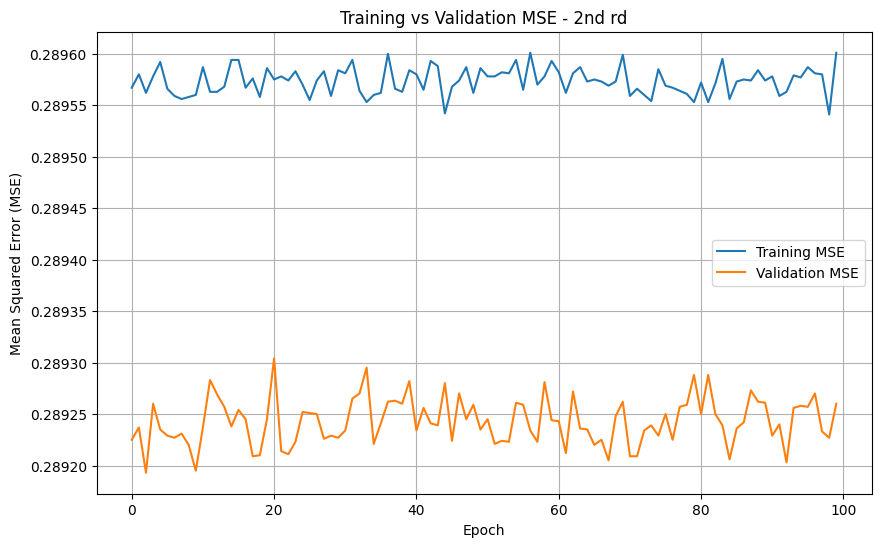

In [12]:
text = """
0 Lambda training mse:  0.289567 | Lambda validation mse: 0.289225
1 Lambda training mse:  0.289580 | Lambda validation mse: 0.289237
2 Lambda training mse:  0.289562 | Lambda validation mse: 0.289193
3 Lambda training mse:  0.289578 | Lambda validation mse: 0.289260
4 Lambda training mse:  0.289592 | Lambda validation mse: 0.289235
5 Lambda training mse:  0.289566 | Lambda validation mse: 0.289229
6 Lambda training mse:  0.289559 | Lambda validation mse: 0.289227
7 Lambda training mse:  0.289556 | Lambda validation mse: 0.289231
8 Lambda training mse:  0.289558 | Lambda validation mse: 0.289220
9 Lambda training mse:  0.289560 | Lambda validation mse: 0.289195
10 Lambda training mse:  0.289587 | Lambda validation mse: 0.289237
11 Lambda training mse:  0.289563 | Lambda validation mse: 0.289283
12 Lambda training mse:  0.289563 | Lambda validation mse: 0.289269
13 Lambda training mse:  0.289568 | Lambda validation mse: 0.289257
14 Lambda training mse:  0.289594 | Lambda validation mse: 0.289238
15 Lambda training mse:  0.289594 | Lambda validation mse: 0.289254
16 Lambda training mse:  0.289567 | Lambda validation mse: 0.289245
17 Lambda training mse:  0.289576 | Lambda validation mse: 0.289209
18 Lambda training mse:  0.289558 | Lambda validation mse: 0.289210
19 Lambda training mse:  0.289586 | Lambda validation mse: 0.289245
20 Lambda training mse:  0.289575 | Lambda validation mse: 0.289304
21 Lambda training mse:  0.289578 | Lambda validation mse: 0.289214
22 Lambda training mse:  0.289574 | Lambda validation mse: 0.289211
23 Lambda training mse:  0.289583 | Lambda validation mse: 0.289223
24 Lambda training mse:  0.289570 | Lambda validation mse: 0.289252
25 Lambda training mse:  0.289555 | Lambda validation mse: 0.289251
26 Lambda training mse:  0.289574 | Lambda validation mse: 0.289250
27 Lambda training mse:  0.289583 | Lambda validation mse: 0.289226
28 Lambda training mse:  0.289559 | Lambda validation mse: 0.289229
29 Lambda training mse:  0.289584 | Lambda validation mse: 0.289227
30 Lambda training mse:  0.289581 | Lambda validation mse: 0.289234
31 Lambda training mse:  0.289594 | Lambda validation mse: 0.289265
32 Lambda training mse:  0.289564 | Lambda validation mse: 0.289270
33 Lambda training mse:  0.289553 | Lambda validation mse: 0.289295
34 Lambda training mse:  0.289560 | Lambda validation mse: 0.289221
35 Lambda training mse:  0.289562 | Lambda validation mse: 0.289241
36 Lambda training mse:  0.289600 | Lambda validation mse: 0.289262
37 Lambda training mse:  0.289566 | Lambda validation mse: 0.289263
38 Lambda training mse:  0.289563 | Lambda validation mse: 0.289260
39 Lambda training mse:  0.289584 | Lambda validation mse: 0.289282
40 Lambda training mse:  0.289580 | Lambda validation mse: 0.289234
41 Lambda training mse:  0.289565 | Lambda validation mse: 0.289256
42 Lambda training mse:  0.289593 | Lambda validation mse: 0.289241
43 Lambda training mse:  0.289588 | Lambda validation mse: 0.289239
44 Lambda training mse:  0.289542 | Lambda validation mse: 0.289280
45 Lambda training mse:  0.289568 | Lambda validation mse: 0.289224
46 Lambda training mse:  0.289574 | Lambda validation mse: 0.289270
47 Lambda training mse:  0.289587 | Lambda validation mse: 0.289245
48 Lambda training mse:  0.289562 | Lambda validation mse: 0.289259
49 Lambda training mse:  0.289586 | Lambda validation mse: 0.289235
50 Lambda training mse:  0.289578 | Lambda validation mse: 0.289245
51 Lambda training mse:  0.289578 | Lambda validation mse: 0.289221
52 Lambda training mse:  0.289582 | Lambda validation mse: 0.289224
53 Lambda training mse:  0.289581 | Lambda validation mse: 0.289223
54 Lambda training mse:  0.289594 | Lambda validation mse: 0.289261
55 Lambda training mse:  0.289565 | Lambda validation mse: 0.289259
56 Lambda training mse:  0.289601 | Lambda validation mse: 0.289234
57 Lambda training mse:  0.289570 | Lambda validation mse: 0.289223
58 Lambda training mse:  0.289578 | Lambda validation mse: 0.289281
59 Lambda training mse:  0.289593 | Lambda validation mse: 0.289244
60 Lambda training mse:  0.289582 | Lambda validation mse: 0.289243
61 Lambda training mse:  0.289562 | Lambda validation mse: 0.289212
62 Lambda training mse:  0.289581 | Lambda validation mse: 0.289272
63 Lambda training mse:  0.289587 | Lambda validation mse: 0.289236
64 Lambda training mse:  0.289573 | Lambda validation mse: 0.289235
65 Lambda training mse:  0.289575 | Lambda validation mse: 0.289220
66 Lambda training mse:  0.289573 | Lambda validation mse: 0.289225
67 Lambda training mse:  0.289569 | Lambda validation mse: 0.289205
68 Lambda training mse:  0.289573 | Lambda validation mse: 0.289248
69 Lambda training mse:  0.289599 | Lambda validation mse: 0.289262
70 Lambda training mse:  0.289559 | Lambda validation mse: 0.289209
71 Lambda training mse:  0.289566 | Lambda validation mse: 0.289209
72 Lambda training mse:  0.289560 | Lambda validation mse: 0.289234
73 Lambda training mse:  0.289554 | Lambda validation mse: 0.289239
74 Lambda training mse:  0.289585 | Lambda validation mse: 0.289229
75 Lambda training mse:  0.289569 | Lambda validation mse: 0.289250
76 Lambda training mse:  0.289567 | Lambda validation mse: 0.289225
77 Lambda training mse:  0.289564 | Lambda validation mse: 0.289257
78 Lambda training mse:  0.289561 | Lambda validation mse: 0.289259
79 Lambda training mse:  0.289553 | Lambda validation mse: 0.289288
80 Lambda training mse:  0.289572 | Lambda validation mse: 0.289250
81 Lambda training mse:  0.289553 | Lambda validation mse: 0.289288
82 Lambda training mse:  0.289571 | Lambda validation mse: 0.289250
83 Lambda training mse:  0.289595 | Lambda validation mse: 0.289239
84 Lambda training mse:  0.289556 | Lambda validation mse: 0.289206
85 Lambda training mse:  0.289573 | Lambda validation mse: 0.289236
86 Lambda training mse:  0.289575 | Lambda validation mse: 0.289242
87 Lambda training mse:  0.289574 | Lambda validation mse: 0.289273
88 Lambda training mse:  0.289584 | Lambda validation mse: 0.289262
89 Lambda training mse:  0.289574 | Lambda validation mse: 0.289261
90 Lambda training mse:  0.289578 | Lambda validation mse: 0.289229
91 Lambda training mse:  0.289559 | Lambda validation mse: 0.289240
92 Lambda training mse:  0.289563 | Lambda validation mse: 0.289203
93 Lambda training mse:  0.289579 | Lambda validation mse: 0.289256
94 Lambda training mse:  0.289577 | Lambda validation mse: 0.289258
95 Lambda training mse:  0.289587 | Lambda validation mse: 0.289257
96 Lambda training mse:  0.289581 | Lambda validation mse: 0.289270
97 Lambda training mse:  0.289580 | Lambda validation mse: 0.289233
98 Lambda training mse:  0.289541 | Lambda validation mse: 0.289227
99 Lambda training mse:  0.289601 | Lambda validation mse: 0.289260
"""
train_mse = [float(match) for match in re.findall(r"Lambda training mse:\s+([0-9\.]+)", text)]
val_mse = [float(match) for match in re.findall(r"Lambda validation mse:\s+([0-9\.]+)", text)]
epochs = range(100)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_mse, label='Training MSE')
plt.plot(epochs, val_mse, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs Validation MSE - 2nd rd')
plt.legend()

plt.grid(True)
plt.show()

In [3]:
df = pd.read_csv('/hpc/group/naderilab/eleanor/Efficient_PLM/prose/ALLY/saved_emb/re_reg_cos_lr_a_0.05_rd_0_pred.csv')


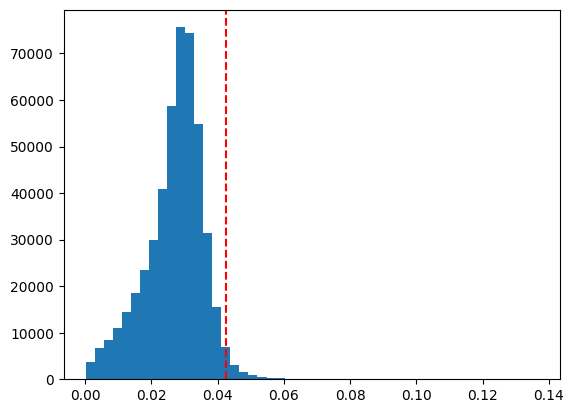

In [9]:
c = df['sorted_preds'].quantile(1-10000/len(df))
plt.hist(df['sorted_preds'], bins=50)
plt.axvline(c, color='red', linestyle='--', label=f'selection quantile: {c:.2f}')
plt.show()

In [6]:
50000/len(df)

0.10386200478596118

In [7]:
10000/len(df)

0.020772400957192235

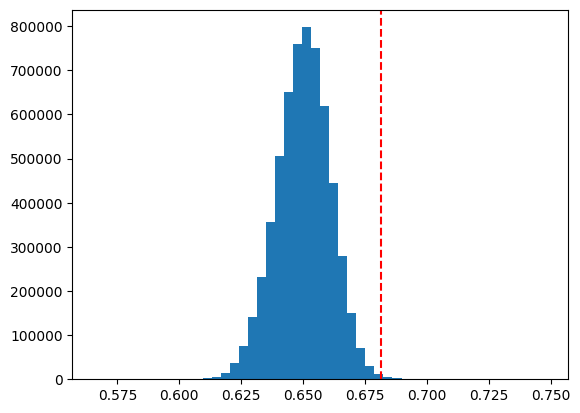

In [3]:
import pandas as pd
df = pd.read_csv('/hpc/group/naderilab/eleanor/Efficient_PLM/prose/ALLY/saved_emb/a_0.1_slr_0.05_rd_4_pred.csv')
c = df['sorted_preds'].quantile(1-10000/len(df))
plt.hist(df['sorted_preds'], bins=50)
plt.axvline(c, color='red', linestyle='--', label=f'selection quantile: {c:.2f}')
plt.show()